<center><img src="https://i.imgur.com/YNtjmbq.png" width="800"></center> 

# Práctica 2 – Exploración de Redes


En el año 2018, Quinten Dol sugirió a los usuarios de Twitter seguir a estas celebridades de la Tecnologia local:

In [ ]:
from IPython.display import IFrame
IFrame('https://www.builtinseattle.com/2018/08/06/50-seattle-tech-twitter-accounts-to-follow', 800, 350)

Aunque proponía 50 _influencers_, sólo hay 46 activos en X (antes Twitter). Se construyó una red para ver si entre ellos se seguían, y esto tenemos:

In [ ]:
IFrame('https://docs.google.com/spreadsheets/d/e/2PACX-1vQaaNQb2frjnlt0fPSBQhp5tNydB0a9ibp98sblBn6OfvGd8vsx8cfHb4w8Cm_qC3EIeYFby_zNQBoK/pubhtml', 800, 350)

<div class="alert alert-info" role="alert">
    
## Data para la sesión

Para esta sesión, los datos del archivo **SeattleTop** puedes descargarlos en _tu_ carpeta **data** desde este [enlace](https://drive.google.com/drive/folders/1QXy0RwgNUBryirnVx0-_-rfr3WZxSld5?usp=sharing).
</div>



# Exploración Básica de la red

Como ya sabemos, la red se arma con la **adjacency matrix** o la **edgelist**. Hagámoslo nuevamente:

In [1]:
# librerias necesarias
import networkx as nx
import pandas as pd

# link a GoogleDrive como un Excel
linkGoogle="https://docs.google.com/spreadsheets/d/e/2PACX-1vQaaNQb2frjnlt0fPSBQhp5tNydB0a9ibp98sblBn6OfvGd8vsx8cfHb4w8Cm_qC3EIeYFby_zNQBoK/pub?output=xlsx"

# leyendo archivo de red
adjacency=pd.read_excel(linkGoogle,   
                        index_col=0,  # la columna '0' guarda los nombres
                        sheet_name='adjacency') # la tabla tiene este nombre

# creando red dirigida
TopFromAdjacency=nx.from_pandas_adjacency(adjacency,create_using=nx.DiGraph)

El objeto **TopFromAdjacency** contiene a la red creada. Esta red es **dirigida** (DiGraph):

In [2]:
type(TopFromAdjacency)

networkx.classes.digraph.DiGraph

¿Tendremos algun _influencer_ que no siga a otro ni sea seguido por otro?

In [3]:
list(nx.isolates(TopFromAdjacency))

[]

De ahi que la red no mostrará nodos aislados:

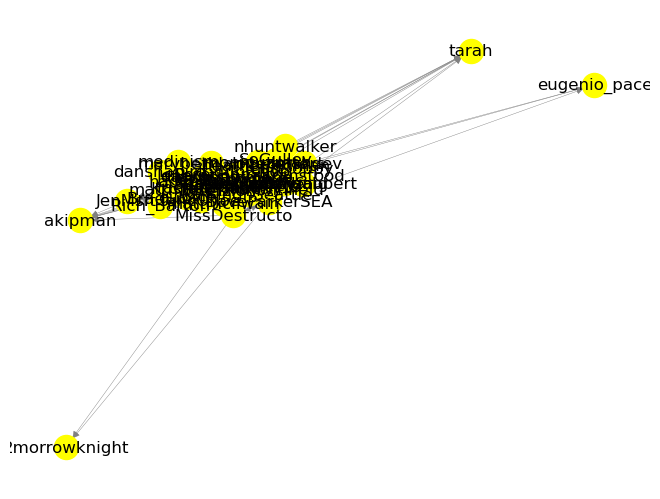

In [4]:
nx.draw(TopFromAdjacency, with_labels=True,edge_color='grey',width=0.3,node_color='yellow')

Por lo general, podemos explorar la red de dos maneras:

1. A nivel de red en total.
2. A nivel de cada actor (nodo).

## Explorando a nivel de red

Recordemos la cantidad de nodos y enlaces de la red.

In [5]:
# nodos , #enlaces
len(TopFromAdjacency.nodes),len(TopFromAdjacency.edges)

(46, 588)

<div class="alert alert-success" role="alert">Red strongly connected 
</div>

Una de las primeras interrogantes, es saber si cada nodo puede conectarse con otro nodo. Para que ello sucede, teniendo en cuenta que la red es dirigida, debe haber un **path** o camino (sequencia de flechas) entre todo par de nodos de la red. Si esto fuera así, se debe verificar que la red es **strongly_connected**.

En esta gráfica de [wikipedia](https://en.wikipedia.org/wiki/Strongly_connected_component) vemos una red que tiene componentes fuertemente conectados, pero la red en su totalidad no lo es:
<figure>
<img src="https://github.com/MAGALLANESJoseManuel/MGPIT_Pol748_Redes_2/raw/main/picsForSession/strongly_connected.png" style="width:70%">
<figcaption align = "center"> Figura 1: Red y componentes fuertemente conectados </figcaption>
</figure>

Nues

Nuestra red tampoco lo es:

In [6]:
nx.is_strongly_connected(TopFromAdjacency)

False

El resultado anterior indica que hay algunos nodos que no pueden ser alcanzados por otros nodos.

Revisemos tres conceptos clave para entedendera la red:

1. Distancia o **Distance**.
2. Alcanzabilidad o **Reachability**.
2. Densidad o **Density**. 

<div class="alert alert-success" role="alert">Gesodesico </div>

La **distance** se entiende como la cantidad de _edges_ que separan un par de nodos. Como entre algun par de nodos puede haber muchas distancias, calculemos el **geodesico** es la distancia más corta entre dos nodos:

In [ ]:
# calcular los geodesicos para cada nodo
geodesics = dict(nx.all_pairs_shortest_path_length(TopFromAdjacency))

# formatear geodesicos como matriz
MatrixGeo = [[geodesics.get(n, {}).get(m, 0)  for m in TopFromAdjacency.nodes] for n in TopFromAdjacency.nodes]

# formatear matriz de geodesicos como dataframe
MatrixGeo_DF=pd.DataFrame(MatrixGeo,index=TopFromAdjacency.nodes, columns=TopFromAdjacency.nodes,dtype=np.int32)

#tenemos
MatrixGeo_DF

La diagonal es cero, pero si alguna fila o columna presenta ceros, nos indica que no hay camino entre esos dos nodos.

Una métrica clave  que podemos calcular de la matriz de geodésicos es el diámetro:

In [ ]:
MatrixGeo_DF.max().max()

Como se ve, es la celda de mayor valor; que podemos obtenerla alternativamente así:

In [ ]:
nx.diameter(TopFromAdjacency.subgraph(Seattle_connComp[3]))

<center><img src="https://github.com/EvansDataScience/CTforGA_Networks/raw/main/diameter.jpeg" width="500"></center>

De la matriz de geodésicos podemos obtener la **reachability matrix**, que nos informa si hay conexión entre nodos:

In [ ]:
MatrixReach_DF=(MatrixGeo_DF>0).replace({True:1,False:0})
MatrixReach_DF

Notese que la fila de _2morrowknight_ está llena de ceros (pero no es la única), déjame mostrarte la red ego de este actor (su vecindario de conexiones):

In [ ]:
nx.draw(nx.ego_graph(TopFromAdjacency,'2morrowknight',undirected=True),with_labels=True)

Se nota que _2morrowknight_ no tiene flechas que salen (out) de éste. Así, a _2morrowknight_ se le puede alcanzar, pero este no puede alcanzar a otros. Las otras filas que tienen este comportamientos podemos hallarlas así:

In [ ]:
Seattle_connComp = sorted(nx.strongly_connected_components(TopFromAdjacency), key=len, reverse=False)
Seattle_connComp[:3]

Aquí los resaltamos gráficamente:

In [ ]:
nodesPositions=nx.spring_layout(TopFromAdjacency,k=0.5)
ConnectedComponents =(TopFromAdjacency.subgraph(c).copy() for c in nx.strongly_connected_components(TopFromAdjacency))
color_map = ['red' if node in Seattle_connComp[3] else 'green' for node in TopFromAdjacency.nodes()]
nx.draw(TopFromAdjacency,nodesPositions,node_color=color_map,with_labels=True)

Un concepto que se desprende del _reachability_ es la **reciprocidad**:

In [ ]:
nx.overall_reciprocity(TopFromAdjacency)

Finalmente, la **densidad** es otro concepto básico a recordar, nos dice que tan cerca está la red de estar completamente conectada:

In [ ]:
nx.density(TopFromAdjacency)

<center><img src="https://cdn.fs.guides.co/PDn0ImTfSb6QwgIvdoQ8" width="500"></center>

<center><img src="https://github.com/MAGALLANESJoseManuel/MGPIT_Pol748_Redes_2/raw/main/picsForSession/reachability-and-density.png" width="500"></center>






## Explorando a nivel de actor

Luego de caracterizar a la red, podemos enfocarnos en la relevancia del actor en la red. La relevancia puede entenderse de diferentes maneras, y aqui las más utilizadas:

* Grado o **DEGREE**: Indica la cantidad de conexiones de un nodo, representada en general como un coeficiente, donde 100% (1) indicaría que el nodo se conecta con todos los nodos. Cuando tenemos una red dirigida, se calcula por separado el **IN**DEGREE y el **OUT**DEGREE.
* Cercanía o **CLOSENESS**: Indica que tan cerca está un nodo a todos los demás. Las conexiones de algun nodo le permiten 'llegar' más rápido a los demás que a otros. Es decir, el promedio de sus geodésicos es el menor de todos. Cuando tenemos una red dirigida, se calcula por separado el **IN**CLOSENESS y el **OUT**CLOSENESS.
* Intermediación o **BETWEENNESS**: Indica que tanto es necesario un nodo para que algun nodo llegue a otro nodo. Esta importancia nace también del concepto del geodésico, pues un actor con alto betweenness aparece mucho en los geodésicos de la red,  y en el caso extremo, tiene la capacidad de desconectar a la red.

Aquí podemos ver estas medidas para todos los actores:

In [ ]:
actorMeasures=pd.concat([pd.DataFrame.from_dict(nx.out_degree_centrality(TopFromAdjacency),
                                  orient='index',
                                  columns=['OutDegree']),
           pd.DataFrame.from_dict(nx.in_degree_centrality(TopFromAdjacency),
                                  orient='index',
                                  columns=['InDegree']),
           pd.DataFrame.from_dict(nx.closeness_centrality(TopFromAdjacency.reverse()),
                                  orient='index',
                                  columns=['OutCloseness']),
           pd.DataFrame.from_dict(nx.closeness_centrality(TopFromAdjacency),
                                  orient='index',
                                  columns=['InCloseness']),
           pd.DataFrame.from_dict(nx.betweenness_centrality(TopFromAdjacency),
                                  orient='index',
                                  columns=['Betweenness'])],axis=1)

actorMeasures

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(actorMeasures.OutCloseness, actorMeasures.InCloseness,s=1000*actorMeasures.InDegree,
           c=100*actorMeasures.Betweenness,
           cmap=plt.get_cmap('YlOrRd'), alpha=0.6)

valsForAnnotate=zip(actorMeasures.index,actorMeasures.OutCloseness,actorMeasures.InCloseness)
for name,coordX,coordY in valsForAnnotate:
    ax.annotate(name, (coordX,coordY),alpha=0.5)
    
plt.title("scatterplot (size for degree of node, color for InDeegree)")
plt.xlabel("OurCloseness")
plt.ylabel("InCloseness")
plt.show()

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(actorMeasures.OutCloseness, actorMeasures.InCloseness,s=1000*actorMeasures.OutDegree,
           c=100*actorMeasures.Betweenness,
           cmap=plt.get_cmap('YlOrRd'), alpha=0.6)

valsForAnnotate=zip(actorMeasures.index,actorMeasures.OutCloseness,actorMeasures.InCloseness)
for name,coordX,coordY in valsForAnnotate:
    ax.annotate(name, (coordX,coordY),alpha=0.5)
    
plt.title("scatterplot (size for degree of node, color for InDeegree)")
plt.xlabel("OurCloseness")
plt.ylabel("InCloseness")
plt.show()

### Pasos previos en UCINET

Para comenzar, no olvide indicar que **data** es el folder por defecto. Abramos en UCINET la matriz de adyacencia como en la sesión anterior (usando el **Matrix Editor**):
 
 
<img src="https://i.imgur.com/5CcgRfx.png" width="800"/>

La matriz de adyacencia se abrirá en el editor. Guardela en el formato de UCINET:


<img src="https://i.imgur.com/5RIrcza.png" width="800"/>

A esta altura, ya debes tener un archivo de UCINET con esta red.


<img src="https://i.imgur.com/2lZCLEg.png" width="800"/>


Ahora, como tenemos atributos, usemos el **DL editor** para abrirlo:



<img src="https://i.imgur.com/n9pKeC2.png" width="800"/>

Una vez abierto, guardalo como archivo UCINET también, pero indica que es de atributos en el nombre del archivo. Nota que estamos usando la opción _Matrix_ en el formato de datos:



<img src="https://i.imgur.com/7RR7Igy.png" width="800"/>


Ahora, ya tenemos los dos archivos que necesitamos para visualizar en **NETDRAW**.

# Visualizando en NETDRAW

Como se sabe, UCINET usa NetDraw para dibujar. Como tenemos archivo de RED y de ATRIBUTO debemos seguir  pasos particulares en cada caso:

<img src="https://i.imgur.com/pt1QwcC.png" width="800"/>


1) La red se abre con la carpeta que muestra una _U_. Proceda.
2) Los atributos se abren con la carpeta que muestra una _A_. Proceda.

Si siguió los pasos, debe ver algo así:


<img src="https://i.imgur.com/fMZeC6c.png" width="800"/>






<div class="alert-success">

## Ejercicio 1

* Si tu red y sus atributos ya está en NETDRAW, ve a **PROPERTIES** en el menú principal.
* Enfocate en los _NODOS_, y selecciona _SIMBOLOS_. En _simbolos_ verás 4 opciones. Piensa en estas tres: Color / Size / Shape.

<img src="https://i.imgur.com/mGnEjxg.png" width="800"/>

* Cada una de esas tres opciones puedes personalizarlas usando los atributos que tienes.

### ¿Donde usarías el atributo **male** y el **followers**?


<br>
</div>

## Exploración básica de la red

In [ ]:
nx.is_directed(TopFromAdjacency)

In [ ]:
sorted(d for n, d in TopFromAdjacency.out_degree())

In [ ]:
pd.DataFrame(TopFromAdjacency.out_degree())